In [3]:
import sys
sys.path.append('../')

import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

from classic_descriptors.featurisation import process_dataframe
from analysis import analysis_stratification_influence, analysis_train_set_size
import dft_descriptors.prepocessing as pp
from dft_descriptors.featurisation import *


from sklearn.metrics import mean_absolute_error, accuracy_score, balanced_accuracy_score, explained_variance_score, r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from rdkit import Chem

data_path = '../data_csv/'

##### this notebook is mainly a copy of: 
https://github.com/PrincetonUniversity/auto-qchem/blob/master/notebooks/Tutorial_template_modeling.ipynb

In [4]:
descritpors_to_remove_lig = ["number_of_atoms",
                        "charge",
                        "multiplicity",
                        "molar_mass",
                        "molar_volume",
                        "E_scf",
                        "zero_point_correction",
                        "E_thermal_correction",
                        "H_thermal_correction",
                        "G_thermal_correction",
                        "E_zpe",
                        "E",
                        "H",
                        "G",
                        "stoichiometry",
                        "converged",
                        "ES_root_molar_volume",
                        "ES_root_electronic_spatial_extent",
                        "X_0",
                        "X_1",
                        "X_2",
                        "X_3",
                        "X_4",
                        "X_5",
                        "X_6",
                        "X_7",
                        "Y_0",
                        "Y_1",
                        "Y_2",
                        "Y_3",
                        "Y_4",
                        "Y_5",
                        "Y_6",
                        "Y_7",
                        "Z_0",
                        "Z_1",
                        "Z_2",
                        "Z_3",
                        "Z_4",
                        "Z_5",
                        "Z_6",
                        "Z_7",
                        "at_0",
                        "at_1",
                        "at_2",
                        "at_3",
                        "at_4",
                        "at_5",
                        "at_6",
                        "at_7",
                        'ES_root_Mulliken_charge_0',
                         'ES_root_Mulliken_charge_1',
                         'ES_root_Mulliken_charge_2',
                         'ES_root_Mulliken_charge_3',
                         'ES_root_Mulliken_charge_4',
                         'ES_root_Mulliken_charge_5',
                         'ES_root_Mulliken_charge_6',
                         'ES_root_Mulliken_charge_7',
                         'ES_root_NPA_charge_0',
                         'ES_root_NPA_charge_1',
                         'ES_root_NPA_charge_2',
                         'ES_root_NPA_charge_3',
                         'ES_root_NPA_charge_4',
                         'ES_root_NPA_charge_5',
                         'ES_root_NPA_charge_6',
                         'ES_root_NPA_charge_7',
                         'ES_root_NPA_core_0',
                         'ES_root_NPA_core_1',
                         'ES_root_NPA_core_2',
                         'ES_root_NPA_core_3',
                         'ES_root_NPA_core_4',
                         'ES_root_NPA_core_5',
                         'ES_root_NPA_core_6',
                         'ES_root_NPA_core_7',
                         'ES_root_NPA_valence_0',
                         'ES_root_NPA_valence_1',
                         'ES_root_NPA_valence_2',
                         'ES_root_NPA_valence_3',
                         'ES_root_NPA_valence_4',
                         'ES_root_NPA_valence_5',
                         'ES_root_NPA_valence_6',
                         'ES_root_NPA_valence_7',
                         'ES_root_NPA_Rydberg_0',
                         'ES_root_NPA_Rydberg_1',
                         'ES_root_NPA_Rydberg_2',
                         'ES_root_NPA_Rydberg_3',
                         'ES_root_NPA_Rydberg_4',
                         'ES_root_NPA_Rydberg_5',
                         'ES_root_NPA_Rydberg_6',
                         'ES_root_NPA_Rydberg_7',
                         'ES_root_NPA_total_0',
                         'ES_root_NPA_total_1',
                         'ES_root_NPA_total_2',
                         'ES_root_NPA_total_3',
                         'ES_root_NPA_total_4',
                         'ES_root_NPA_total_5',
                         'ES_root_NPA_total_6',
                         'ES_root_NPA_total_7',
                         'ES_transition_0',
                         'ES_transition_1',
                         'ES_transition_2',
                         'ES_transition_3',
                         'ES_transition_4',
                         'ES_transition_5',
                         'ES_transition_6',
                         'ES_transition_7',
                         'ES_transition_8',
                         'ES_transition_9',
                         'ES_osc_strength_0',
                         'ES_osc_strength_1',
                         'ES_osc_strength_2',
                         'ES_osc_strength_3',
                         'ES_osc_strength_4',
                         'ES_osc_strength_5',
                         'ES_osc_strength_6',
                         'ES_osc_strength_7',
                         'ES_osc_strength_8',
                         'ES_osc_strength_9',
                         'ES_<S**2>_0',
                         'ES_<S**2>_1',
                         'ES_<S**2>_2',
                         'ES_<S**2>_3',
                         'ES_<S**2>_4',
                         'ES_<S**2>_5',
                         'ES_<S**2>_6',
                         'ES_<S**2>_7',
                         'ES_<S**2>_8',
                         'ES_<S**2>_9']

descritpors_to_remove_ax = ["number_of_atoms",
                        "charge",
                        "multiplicity",
                        "molar_mass",
                        "molar_volume",
                        "E_scf",
                        "zero_point_correction",
                        "E_thermal_correction",
                        "H_thermal_correction",
                        "G_thermal_correction",
                        "E_zpe",
                        "E",
                        "H",
                        "G",
                        "stoichiometry",
                        "converged",
                        "ES_root_molar_volume",
                        "ES_root_electronic_spatial_extent",
                        "X_0",
                        "X_1",
                        "X_2",
                        "X_3",
                        "Y_0",
                        "Y_1",
                        "Y_2",
                        "Y_3",
                        "Z_0",
                        "Z_1",
                        "Z_2",
                        "Z_3",
                        "at_0",
                        "at_1",
                        "at_2",
                        "at_3",
                        'ES_root_Mulliken_charge_0',
                         'ES_root_Mulliken_charge_1',
                         'ES_root_Mulliken_charge_2',
                         'ES_root_Mulliken_charge_3',
                         'ES_root_NPA_charge_0',
                         'ES_root_NPA_charge_1',
                         'ES_root_NPA_charge_2',
                         'ES_root_NPA_charge_3',
                         'ES_root_NPA_core_0',
                         'ES_root_NPA_core_1',
                         'ES_root_NPA_core_2',
                         'ES_root_NPA_core_3', 
                         'ES_root_NPA_valence_0',
                         'ES_root_NPA_valence_1',
                         'ES_root_NPA_valence_2',
                         'ES_root_NPA_valence_3',
                         'ES_root_NPA_Rydberg_0',
                         'ES_root_NPA_Rydberg_1',
                         'ES_root_NPA_Rydberg_2',
                         'ES_root_NPA_Rydberg_3',
                         'ES_root_NPA_total_0',
                         'ES_root_NPA_total_1',
                         'ES_root_NPA_total_2',
                         'ES_root_NPA_total_3',
                         'ES_transition_0',
                         'ES_transition_1',
                         'ES_transition_2',
                         'ES_transition_3',
                         'ES_transition_4',
                         'ES_transition_5',
                         'ES_transition_6',
                         'ES_transition_7',
                         'ES_transition_8',
                         'ES_transition_9',
                         'ES_osc_strength_0',
                         'ES_osc_strength_1',
                         'ES_osc_strength_2',
                         'ES_osc_strength_3',
                         'ES_osc_strength_4',
                         'ES_osc_strength_5',
                         'ES_osc_strength_6',
                         'ES_osc_strength_7',
                         'ES_osc_strength_8',
                         'ES_osc_strength_9',
                         'ES_<S**2>_0',
                         'ES_<S**2>_1',
                         'ES_<S**2>_2',
                         'ES_<S**2>_3',
                         'ES_<S**2>_4',
                         'ES_<S**2>_5',
                         'ES_<S**2>_6',
                         'ES_<S**2>_7',
                         'ES_<S**2>_8',
                         'ES_<S**2>_9']

In [5]:
def duplicates(X, round=None) -> list:
    """Drop duplicate columns in dataframe

    :param X: input dataframe
    :type X: pandas.core.frame.DataFrame
    :param round: decimal point used for rounding. If set the dataframe is scaled with MinMaxScaler \
    and rounded to the given precision, afterward duplicates are removed. This allows to drop duplicates avoiding \
    floating point precision issues
    :type round: int
    :return: list of columns that are duplicates
    """

    X_ = X.copy()
    if round is not None:
        scaler = MinMaxScaler()
        X_ = pd.DataFrame(scaler.fit_transform(X_),
                          columns=X_.columns,
                          index=X_.index)
        X_ = X_.round(round)
    return X_.columns[X_.T.duplicated()].tolist()


def correlated(X, threshold=0.95) -> list:
    """Decorrelate dataframe by finding which columns shall \
    be removed to achieve correlation level below threshold

    :param X: input dataframe
    :type X: pandas.core.frame.DataFrame
    :param threshold: maximum correlation allowed in the frame X
    :type threshold: float
    :return: list of columns to prune in order to achieve desired decorrelation level
    """

    X_ = X.copy()
    N = X_.shape[1]
    corr = X_.corr().abs()

    to_drop = set()
    for i in range(N - 1):
        for j in range(i + 1, N):
            if corr.iloc[i][j] > threshold and i not in to_drop:
                to_drop.add(j)
    return [X_.columns[i] for i in to_drop]

In [6]:
def add_suffix(list_descriptor, suf):
    list_descriptor_suf = []
    for descriptor in list_descriptor:
        list_descriptor_suf.append(str(descriptor + '_' + suf))
    return list_descriptor_suf

def canonicalize_additives(smiles):
    uniques = set(smiles.split('.'))
    s = ""
    for add in uniques:
        s += add
        s += '.'     
    return s[:-1]

def one_hot_encoding(x):
    enc = OneHotEncoder(sparse=False)
    enc.fit(x)
    return enc.transform(x), enc.get_feature_names_out()

def dft_ft(df, data_path = '../data_csv/'):
    # physico-chemical description of solvents
    solv = pd.read_csv(data_path + "solvents.csv", sep = ',', index_col=0)
    solv.drop(columns=["polarisabilite", "Unnamed: 9"], inplace=True)
    solvents = [np.array(solv.loc[solvent]) for solvent in df["Solvent"]]
    col_solv = solv.columns.to_list()
    
    # dft description of ligands 
    # issue : what should we put for nan ? 
    ligs = pd.read_csv(data_path + "ligand_dft.csv", sep = ',', index_col=0)
    ligs.drop(columns=descritpors_to_remove_lig, inplace=True)
    ligs.index.to_list()
    canon_rdkit = []
    for smi in ligs.index.to_list():
        try:
            canon_rdkit.append(Chem.CanonSmiles(smi))
        except:
            canon_rdkit.append(smi)
            print(smi)
    ligs["can_rdkit"] = canon_rdkit
    ligs.set_index("can_rdkit", inplace=True)
    ligands = [np.array(ligs.loc[ligand]) for ligand in df["Ligand effectif"]]
    col_lig = add_suffix(ligs.columns.to_list(), 'lig')
    
    # dft description for suubstrates
    substrate = pd.read_csv(data_path + "substrate_dft.csv", sep = ',', index_col=0)
    substrate = substrate[substrate.duplicated(keep='first') != True]
    substrate.drop(columns=descritpors_to_remove_lig, inplace=True)
    canon_rdkit = [Chem.CanonSmiles(smi_co) for smi_co in substrate.index.to_list() ]
    substrate["can_rdkit"] = canon_rdkit
    substrate.set_index("can_rdkit", inplace=True)
    substrates = [np.array(substrate.loc[sub]) for sub in df["Reactant Smile (C-O)"]]
    col_sub = add_suffix(substrate.columns.to_list(), 'sub')
    
    # dft description for AX
    AX = pd.read_csv(data_path + "AX_dft.csv", sep = ',', index_col=0)
    AX.drop(columns=descritpors_to_remove_ax, inplace=True)
    canon_rdkit = [Chem.CanonSmiles(smi_co) for smi_co in AX.index.to_list() ]
    AX["can_rdkit"] = canon_rdkit
    AX.set_index("can_rdkit", inplace=True)
    AXs = [np.array(AX.loc[ax]) for ax in df["A-X effectif"]]
    col_ax = add_suffix(AX.columns.to_list(), 'ax')
    
    
    ohe_precursors = one_hot_encoding(np.array([precursor_mapping(precursor) for precursor in df["Precurseur Nickel"]]).reshape(-1, 1))
    precursors = ohe_precursors[0]
    col_prec = ohe_precursors[1]
    ohe_additives = one_hot_encoding(np.array([additives_mapping(precursor) for precursor in df["Base/additif après correction effective"]]).reshape(-1, 1))
    additives = ohe_additives[0]
    col_add = ohe_additives[1]
    
    X = []

    for i, row in df.iterrows():
        yield_isolated = process_yield(row["Isolated Yield"])
        yield_gc = process_yield(row['GC/NMR Yield'])
        # If both yields are known, we keep the isolated yield
        if yield_gc:
            y = yield_gc
        if yield_isolated:
            y = yield_isolated
        
        feature_vector = np.concatenate((solvents[i], ligands[i], precursors[i], additives[i], substrates[i], AXs[i], np.array([y])))
        X.append(feature_vector)
        
    columns = np.concatenate((col_solv, col_lig, col_prec, col_add, col_sub, col_ax, np.array(["yield"])))
    df = pd.DataFrame(data=X, columns=columns)
    
    return df

In [7]:
df = pd.read_csv("data_csv/Data_test11082021.csv", sep = ',')
# Removing 
vc = df.DOI.value_counts()
doi_above_10 = np.array(vc[vc > 20].index)

indexes = []

for i, row in df.iterrows():
    if row["DOI"] not in doi_above_10:
        indexes.append(i)
        
df = df.drop(indexes)
df = df.reset_index(drop=True)
df2 = pp.preprocess(df)

In [8]:
df = dft_ft(df2, data_path="data_csv/")

NoLigand


In [9]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

#import xgboost as xgb

logging.basicConfig(level=logging.INFO)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [10]:
for col in df.columns:
    df[col] = df[col].astype(float, errors = 'raise')

In [11]:
df=df.select_dtypes(exclude='object')

In [12]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

In [13]:
X, y = df.loc[:, df.columns != 'yield'], df['yield']
print (f"Number of features: {X.shape[1]}, number of samples: {X.shape[0]}")

Number of features: 358, number of samples: 1603


In [14]:
zero_std = X.std()[X.std() == 0].index
display(f"Zero std columns: {len(zero_std)}")
X = X[X.columns.difference(zero_std)]

'Zero std columns: 0'

In [15]:
dupes = duplicates(X, round=3)
display(f"Duplicate columns: {len(dupes)}")
X = X[X.columns.difference(dupes)]

'Duplicate columns: 3'

In [16]:
high_corr = correlated(X, threshold=0.99)
display(f"Correlated features: {len(high_corr)}")
X = X[X.columns.difference(high_corr)]

'Correlated features: 17'

In [17]:
print (f"Number of features: {X.shape[1]}, number of samples: {X.shape[0]}")


Number of features: 338, number of samples: 1603


/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:>

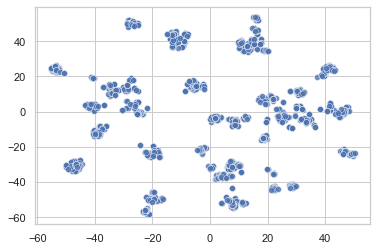

In [18]:
# Chemistry world loves t-SNE plots, so let's make it
tX = TSNE().fit_transform(X)
sns.scatterplot(x=tX[:,0], y=tX[:, 1], alpha=0.8)

<AxesSubplot:>

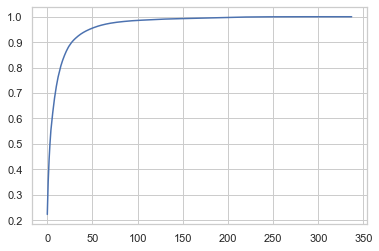

In [19]:
p = PCA()
X_pca = p.fit_transform(X)
explained_var = pd.Series(p.explained_variance_ratio_.cumsum())
explained_var[explained_var < 1].plot(grid=True)

In [20]:
n_pc = 100
X_pca = X_pca[:, :n_pc]

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:>

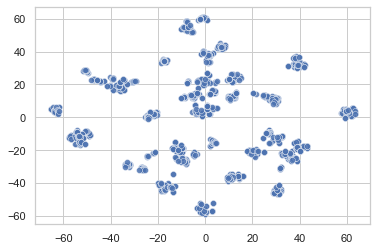

In [21]:
# let's redo the t-SNE plot and see whether things changed
tX_pca = TSNE().fit_transform(X_pca)
sns.scatterplot(x=tX_pca[:,0], y=tX_pca[:, 1], alpha=0.8)

In [22]:
# Modeling

In [23]:
X_reg = X.copy()
X_reg = pd.DataFrame(X_reg, index=df.index)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, y, test_size=0.1, random_state=42)

In [62]:
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score

In [63]:
lr = LinearRegression(fit_intercept=True).fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [64]:
print (f" R2: {round(r2_score(y_test, y_pred), 4)}, MAE: {round(mean_absolute_error(y_test, y_pred), 4)}")

data=pd.concat([pd.Series(y_pred), pd.Series(y_test)], axis=1)
data.columns=['Predictions', 'Yield']

#g = sns.jointplot(x='Predictions', y='Yield', data=data)

 R2: -0.1659, MAE: 0.1947


In [66]:
# Lasso

In [67]:
model = LassoCV(cv=5).fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015865860330897874, tolerance: 0.009515831446478775
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01095587501566797, tolerance: 0.009515831446478775
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009548131608461574, tolerance: 0.009515831446478775
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3114061090946123, tolerance: 0.009515831446478775
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3883326235040343, tolerance: 0.009515831446478775
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011792681779049019, tolerance: 0.009635824034452123
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/ana

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03187237358028483, tolerance: 0.009932934981522243
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03551448626954112, tolerance: 0.009932934981522243
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.035385007338689434, tolerance: 0.009932934981522243
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/a

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1068012351453973, tolerance: 0.009895866636888644
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11058438746344734, tolerance: 0.009895866636888644
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10555399853944891, tolerance: 0.009895866636888644
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/ana

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3594893079721473, tolerance: 0.009617730868547532
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1497611625602886, tolerance: 0.009617730868547532
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08737125918013788, tolerance: 0.009617730868547532
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/anac

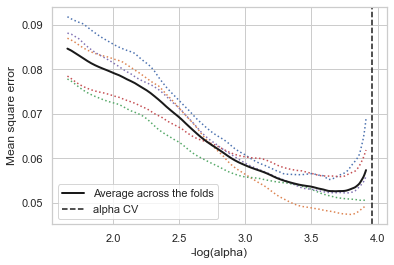

In [68]:
# Display results
EPSILON = 1e-4
m_log_alphas = -np.log10(model.alphas_ + EPSILON)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.axis('tight')

plt.show()

In [69]:
print (f" R2: {round(r2_score(y_test, y_pred), 4)}, MAE: {round(mean_absolute_error(y_test, y_pred), 4)}")

data=pd.concat([pd.Series(y_pred), pd.Series(y_test)], axis=1)
data.columns=['Predictions', 'Yield']

 R2: 0.4355, MAE: 0.1699


,Predictions,Yield
0,0.429976,NaN
1,0.449471,NaN
2,0.709313,NaN
3,0.789304,NaN
4,0.593715,NaN
...,...,...
1552,NaN,0.939394
1572,NaN,1.000000
1573,NaN,0.000000
1594,NaN,1.000000


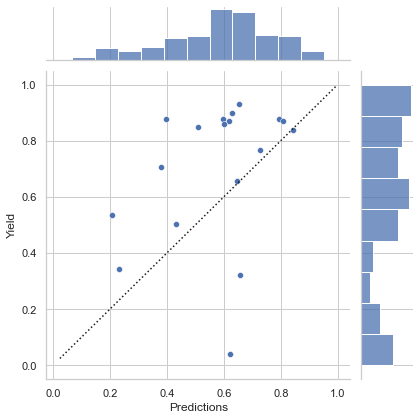

In [70]:
g = sns.jointplot(x='Predictions', y='Yield', data=data)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')

In [71]:
# RF

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [73]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [74]:
print (f" R2: {round(r2_score(y_test, y_pred), 4)}, MAE: {round(mean_absolute_error(y_test, y_pred), 4)}")

data=pd.concat([pd.Series(y_pred), pd.Series(y_test)], axis=1)
data.columns=['Predictions', 'Yield']

 R2: 0.5166, MAE: 0.1405


,Predictions,Yield
0,0.599521,NaN
1,0.347808,NaN
2,0.589293,NaN
3,0.829663,NaN
4,0.833731,NaN
...,...,...
1552,NaN,0.939394
1572,NaN,1.000000
1573,NaN,0.000000
1594,NaN,1.000000


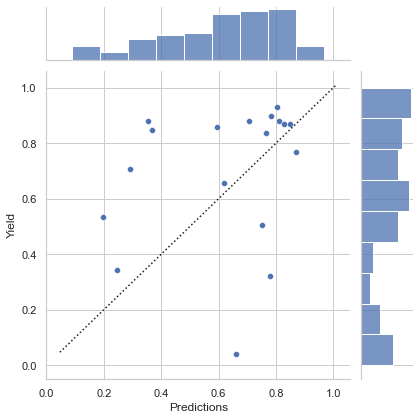

In [75]:
g = sns.jointplot(x='Predictions', y='Yield', data=data)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')

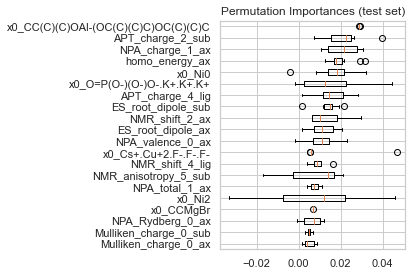

In [76]:
keep_feautres = 20
result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()[-keep_feautres:]

fig, ax = plt.subplots()

ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_reg.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [77]:
import xgboost as xgb

params = {"objective": "reg:squarederror",
          "booster" : "gbtree",
          "eta": 0.3,
          "max_depth": 8,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "silent":1,
          }
num_boost_round = 1000

In [78]:
new_cols = []
for col_name in X_train.columns:
    new = col_name.replace('[', '').replace(']', '')
    new_cols.append(new)
X_train.columns = new_cols

new_cols = []
for col_name in X_test.columns:
    new = col_name.replace('[', '').replace(']', '')
    new_cols.append(new)
X_test.columns = new_cols

new_cols = []
for col_name in X_reg.columns:
    new = col_name.replace('[', '').replace(']', '')
    new_cols.append(new)
X_reg.columns = new_cols

In [79]:
dtrain = xgb.DMatrix(data=pd.DataFrame(X_train, columns=X_reg.columns), label=y_train)
dtest = xgb.DMatrix(data=pd.DataFrame(X_test, columns=X_reg.columns), label=y_test)

In [80]:
watchlist = [(dtrain, 'train'), (dtest, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=100, verbose_eval=False)


[00:10:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [81]:
y_pred=gbm.predict(dtest)

 R2: 0.5411, MAE: 0.1372


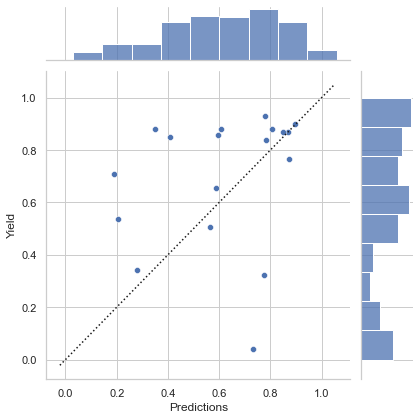

In [82]:
print (f" R2: {round(r2_score(y_test, y_pred), 4)}, MAE: {round(mean_absolute_error(y_test, y_pred), 4)}")

data=pd.concat([pd.Series(y_pred), pd.Series(y_test)], axis=1)
data.columns=['Predictions', 'Yield']

g = sns.jointplot(x='Predictions', y='Yield', data=data)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

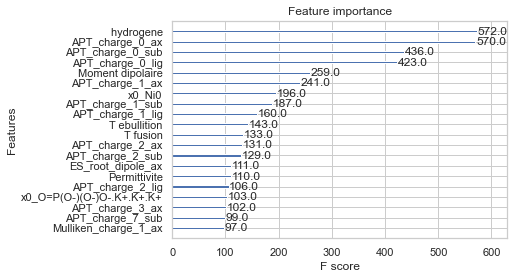

In [83]:
xgb.plot_importance(gbm, max_num_features=20)
